<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>Data Sciences</center>
# <center>Network Data</center>
---

# Matrix representation of graph

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
A = np.array([[0,1,0],
              [1,0,1],
              [1,0,0]])
print(A)

[[0 1 0]
 [1 0 1]
 [1 0 0]]


In [4]:
G = nx.from_numpy_array(A, create_using=nx.MultiDiGraph)
G = nx.relabel_nodes(G, {0:'A',1:'B',2:'C'})

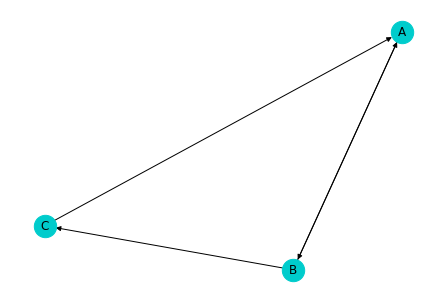

In [5]:
nx.draw(G, with_labels=True, node_size=500, node_color='#00CCCC')

# From Pandas adjacency

In [6]:
import pandas as pd
A_df = pd.DataFrame(A, 
                    columns=['A','B','C'], 
                    index=['A','B','C'])
A_df

,A,B,C
A,0,1,0
B,1,0,1
C,1,0,0


In [7]:
G_df = nx.from_pandas_adjacency(A_df)

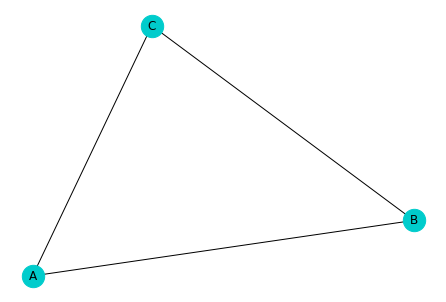

In [8]:
nx.draw(G_df, with_labels=True, node_size=500, node_color='#00CCCC')

# Traversal as a matrix operation

In [9]:
A2 = np.matmul(A,A)
print(A2)

[[1 0 1]
 [1 1 0]
 [0 1 0]]


In [10]:
G2 = nx.from_numpy_array(A2, create_using=nx.MultiDiGraph)
G2 = nx.relabel_nodes(G2, {0:'A',1:'B',2:'C'})

In [11]:
# Need to install pydot
import networkx
import pydot
G2_v = nx.nx_pydot.to_pydot(G2)

In [12]:
G2_v.write_png("test.png")

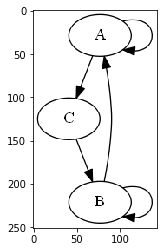

In [13]:
plt.imshow(plt.imread('test.png'))

# Activity: Try traversal 4 times from intial matrix A

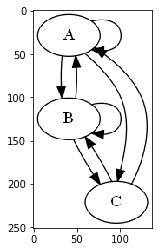

In [20]:
A4 = np.matmul(A2,A2)
G3 = nx.from_numpy_array(A4, create_using=nx.MultiDiGraph)
G3 = nx.relabel_nodes(G3, {0:'A',1:'B',2:'C'})
G3_v = nx.nx_pydot.to_pydot(G3)
G3_v.write_png("test.png")
plt.imshow(plt.imread('test.png'))

In [17]:
A4

array([[1, 1, 1],
       [2, 1, 1],
       [1, 1, 0]])

In [19]:
A @ A @ A @ A

array([[1, 1, 1],
       [2, 1, 1],
       [1, 1, 0]])

# Edge List Representation

In [31]:
el = pd.DataFrame({'source':['A','B','B','C'], 
                   'target':['B','A','C','A']})
print(el)

  source target
0      A      B
1      B      A
2      B      C
3      C      A


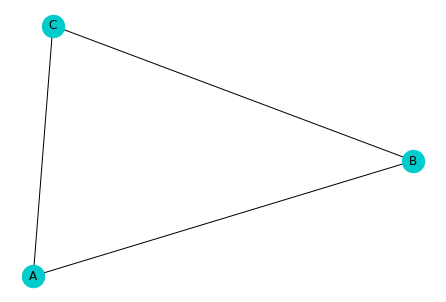

In [32]:
G_el = nx.from_pandas_edgelist(el)
nx.draw(G_el, with_labels=True, node_size=500, node_color='#00CCCC')

# Networkx object - Graph

## Create graph and add nodes

In [33]:
G = nx.Graph()

In [34]:
G.add_node(1)

In [35]:
G.add_nodes_from([2,3])

In [36]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [38]:
G.nodes()

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9))

## Add edges

In [39]:
G.add_edge(2,3)

In [40]:
G.add_edges_from([(1,2),(1,3)])

In [41]:
G.add_edges_from(H.edges())

In [42]:
G.remove_node(9)

In [43]:
G.nodes()

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8))

In [44]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)])

# Add number of nodes/edges

In [45]:
G.number_of_edges()

9

In [46]:
G.number_of_nodes()

9

In [48]:
nx.number_of_selfloops(G)

0

# Graph information

In [49]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 9
Average degree:   2.0000


# Degree

In [50]:
G = nx.read_edgelist('facebook_combined.txt', 
                     create_using=nx.MultiDiGraph)

In [51]:
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 4039
Number of edges: 88234
Average in degree:  21.8455
Average out degree:  21.8455


In [52]:
pd.DataFrame(G.degree, columns=['Node','Degree'])

,Node,Degree
0,0,347
1,1,17
2,2,10
3,3,17
4,4,10
...,...,...
4034,4034,2
4035,4035,1
4036,4036,2
4037,4037,4


In [53]:
nx.write_graphml(G,'test.graphml')

# In/Out Degree

In [54]:
pd.DataFrame(G.in_degree, columns=['Node','Degree'])

,Node,Degree
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
4034,4034,2
4035,4035,1
4036,4036,2
4037,4037,4


In [55]:
pd.DataFrame(G.out_degree, columns=['Node','Degree'])

,Node,Degree
0,0,347
1,1,16
2,2,9
3,3,16
4,4,9
...,...,...
4034,4034,0
4035,4035,0
4036,4036,0
4037,4037,0


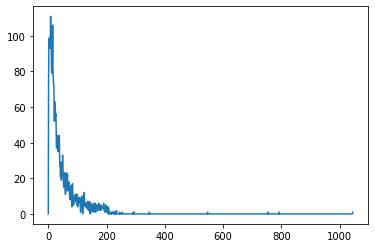

In [56]:
plt.plot(nx.degree_histogram(G))

# Neighbor

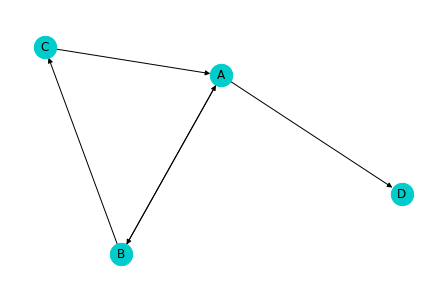

In [57]:
G1 = nx.from_pandas_adjacency(A_df, create_using=nx.MultiDiGraph)
G1.add_edge('A','D')
nx.draw(G1, with_labels=True, node_size=500, node_color='#00CCCC')
plt.show()

In [58]:
[x for x in nx.neighbors(G1,'A')]

['B', 'D']

In [59]:
[x for x in nx.all_neighbors(G1,'A')]

['B', 'C', 'B', 'D']

# Common neighbors (for undirected graph)


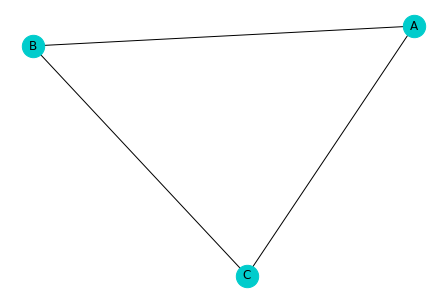

In [60]:
nx.draw(G_df, with_labels=True, node_size=500, node_color='#00CCCC')
plt.show()

In [61]:
[x for x in nx.common_neighbors(G_df,'B','A')]

['C']

# Subgraph

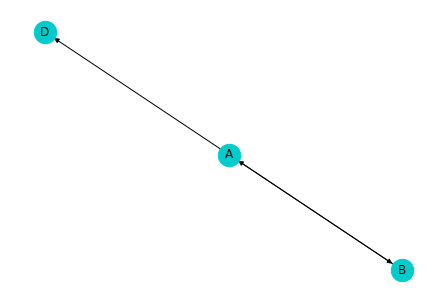

In [62]:
G1_sub = nx.subgraph(G1,['A','B','D'])
nx.draw(G1_sub, with_labels=True, node_size=500, node_color='#00CCCC')

# Path

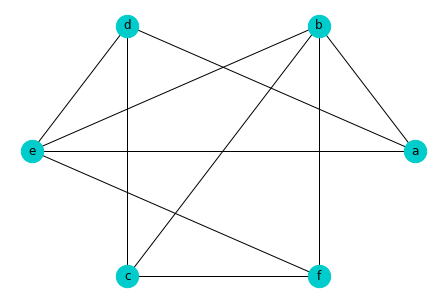

In [63]:
el2 = pd.DataFrame([['a','b'],
                    ['a','d'],
                    ['a','e'],
                    ['b','c'],
                    ['b','e'],
                    ['b','f'],
                    ['c','d'],
                    ['c','f'],
                    ['d','e'],
                    ['e','f']], columns=['source','target'])
G2 = nx.from_pandas_edgelist(el2)
nx.draw_shell(G2, with_labels=True, node_size=500, node_color='#00CCCC')

In [64]:
[x for x in nx.simple_paths.all_simple_paths(G2,'a','c')]

[['a', 'b', 'c'],
 ['a', 'b', 'e', 'd', 'c'],
 ['a', 'b', 'e', 'f', 'c'],
 ['a', 'b', 'f', 'c'],
 ['a', 'b', 'f', 'e', 'd', 'c'],
 ['a', 'd', 'c'],
 ['a', 'd', 'e', 'b', 'c'],
 ['a', 'd', 'e', 'b', 'f', 'c'],
 ['a', 'd', 'e', 'f', 'b', 'c'],
 ['a', 'd', 'e', 'f', 'c'],
 ['a', 'e', 'b', 'c'],
 ['a', 'e', 'b', 'f', 'c'],
 ['a', 'e', 'd', 'c'],
 ['a', 'e', 'f', 'b', 'c'],
 ['a', 'e', 'f', 'c']]

# Shortest path

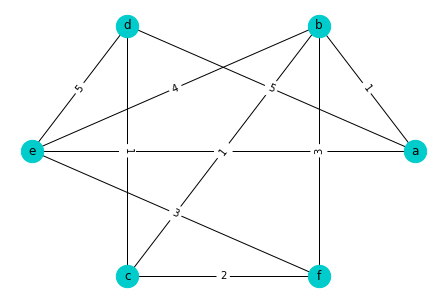

In [65]:
elw = pd.DataFrame([['a','b',1],
                    ['a','d',5],
                    ['a','e',2],
                    ['b','c',1],
                    ['b','e',4],
                    ['b','f',3],
                    ['c','d',1],
                    ['c','f',2],
                    ['d','e',5],
                    ['e','f',3]], columns=['source','target','weight'])
G2 = nx.from_pandas_edgelist(elw,edge_attr='weight')
nx.draw_shell(G2, with_labels=True, node_size=500, node_color='#00CCCC')
labels = nx.get_edge_attributes(G2,'weight')
nx.draw_networkx_edge_labels(G2,pos=nx.shell_layout(G2),edge_labels=labels)
plt.show()

In [66]:
nx.shortest_path(G2,'a','d',weight='weight')

['a', 'b', 'c', 'd']

# Connected component

In [67]:
A3 = pd.read_csv('components.csv',index_col=0)
print(A3)

    A1  A2  A3  A4  A5  A6  A7  A8
A1   0   1   0   1   0   0   0   0
A2   0   0   1   1   0   0   0   0
A3   1   1   0   1   0   0   0   0
A4   1   0   0   0   0   0   0   0
A5   0   0   0   0   0   1   0   1
A6   0   0   0   0   0   0   1   1
A7   0   0   0   0   1   1   0   0
A8   0   0   0   0   0   1   1   0


C:\Users\taira\anaconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


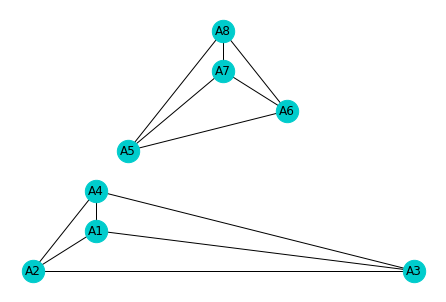

In [68]:
G3 = nx.from_pandas_adjacency(A3)
nx.draw_planar(G3, with_labels=True, node_size=500, node_color='#00CCCC')

In [69]:
[x for x in nx.connected_components(G3)]

[{'A1', 'A2', 'A3', 'A4'}, {'A5', 'A6', 'A7', 'A8'}]

In [70]:
nx.get_edge_attributes(G2,'weight')

{('a', 'b'): 1,
 ('a', 'd'): 5,
 ('a', 'e'): 2,
 ('b', 'c'): 1,
 ('b', 'e'): 4,
 ('b', 'f'): 3,
 ('d', 'c'): 1,
 ('d', 'e'): 5,
 ('e', 'f'): 3,
 ('c', 'f'): 2}

# Activity

In [ ]:
# work here